In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import PIL
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

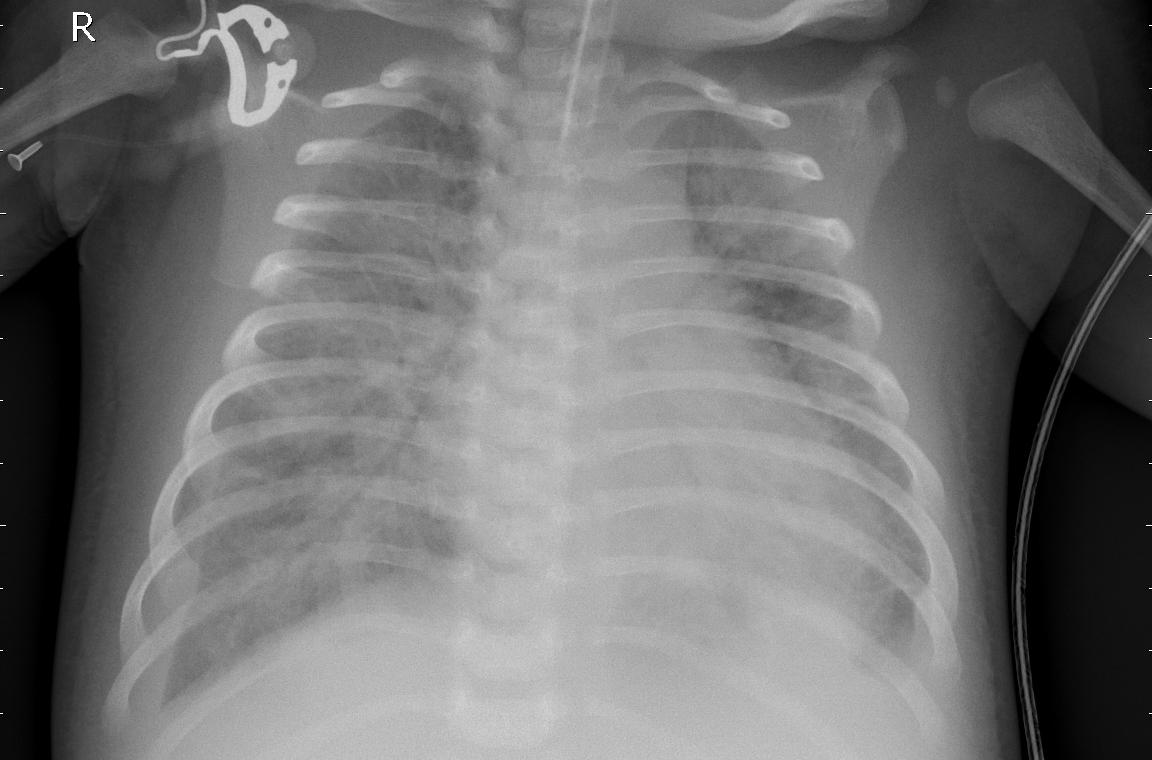

In [2]:
image = PIL.Image.open('C:/Users/MONISHA/Downloads/extracted_dataset/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
image

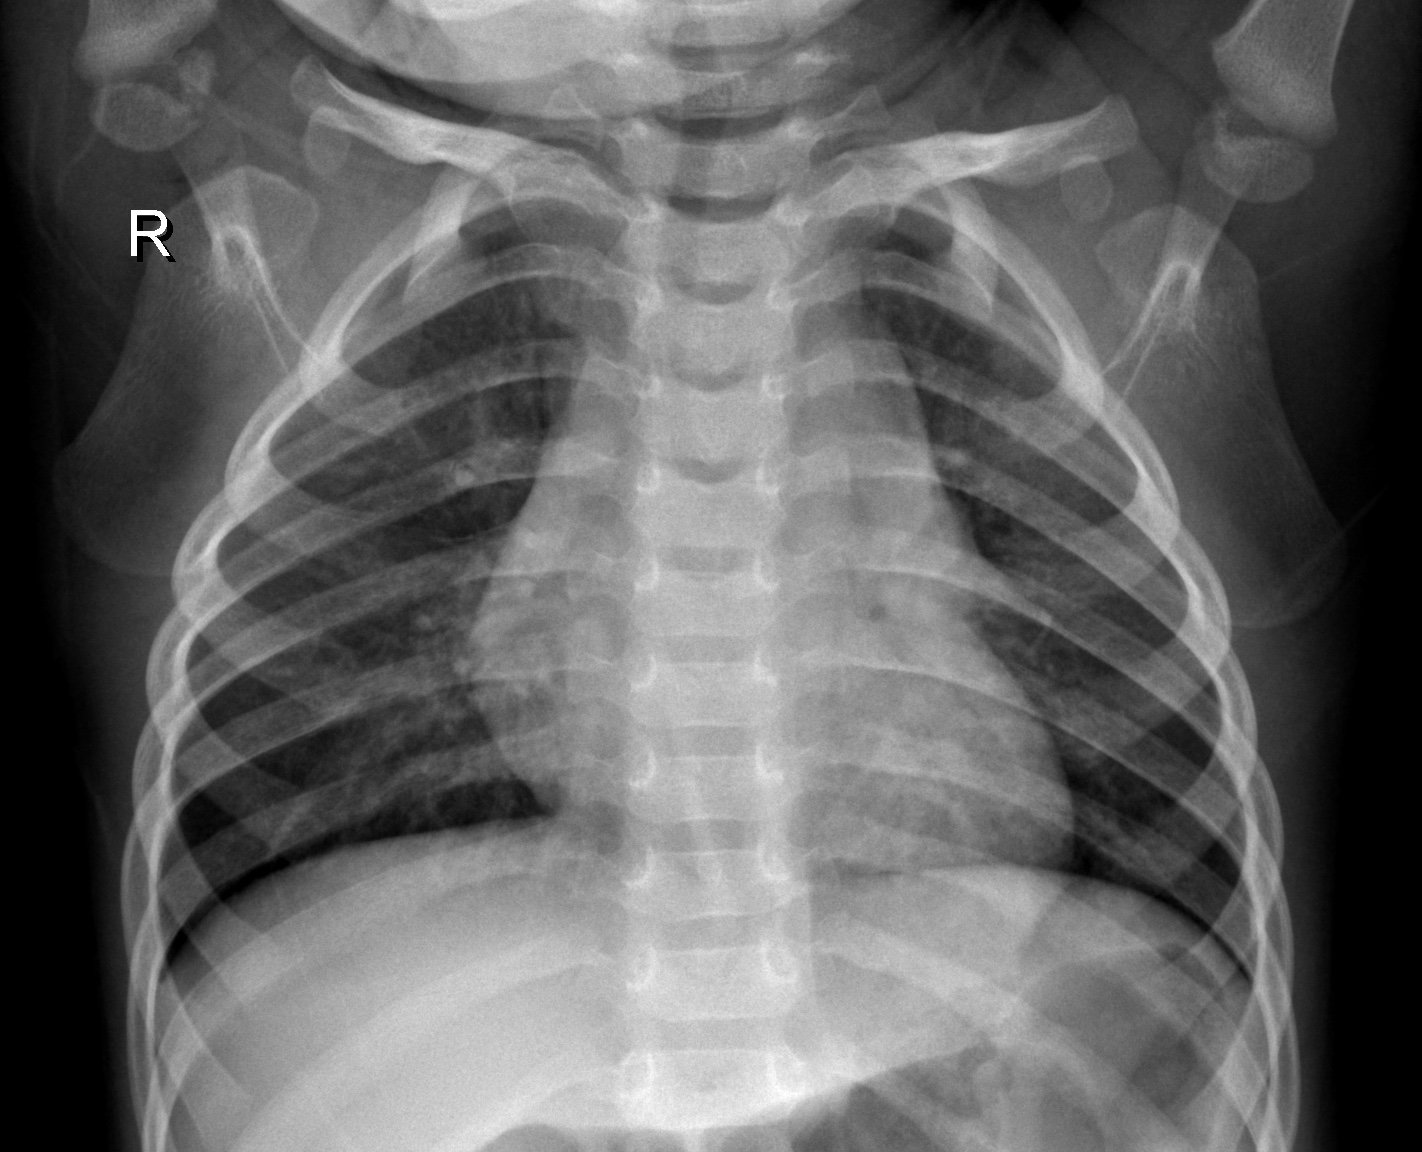

In [4]:
image_normal = PIL.Image.open('C:/Users/MONISHA/Downloads/extracted_dataset/chest_xray/train/NORMAL/IM-0117-0001.jpeg')
image_normal

In [6]:
train_dir = 'C:/Users/MONISHA/Downloads/extracted_dataset/chest_xray/train'
training_generator = ImageDataGenerator(rescale = 1/255)
train_data = training_generator.flow_from_directory(train_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [7]:
valid_dir = 'C:/Users/MONISHA/Downloads/extracted_dataset/chest_xray/val'
validation_generator = ImageDataGenerator(rescale = 1/255)
valid_data = validation_generator.flow_from_directory(valid_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 16 images belonging to 2 classes.


In [8]:
test_dir = 'C:/Users/MONISHA/Downloads/extracted_dataset/chest_xray/test'
testing_generator = ImageDataGenerator(rescale = 1/255)
test_data = testing_generator.flow_from_directory(test_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 624 images belonging to 2 classes.


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [12]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
652/652 [==============================] - 162s 245ms/step - loss: 0.4875 - acc: 0.7874 - val_loss: 1.0770 - val_acc: 0.6875
Epoch 2/10
652/652 [==============================] - 158s 243ms/step - loss: 0.2051 - acc: 0.9141 - val_loss: 0.3490 - val_acc: 0.8125
Epoch 3/10
652/652 [==============================] - 166s 254ms/step - loss: 0.1265 - acc: 0.9517 - val_loss: 0.2530 - val_acc: 0.8750
Epoch 4/10
652/652 [==============================] - 162s 249ms/step - loss: 0.1112 - acc: 0.9576 - val_loss: 0.1581 - val_acc: 1.0000
Epoch 5/10
652/652 [==============================] - 166s 255ms/step - loss: 0.0970 - acc: 0.9630 - val_loss: 0.4304 - val_acc: 0.8125
Epoch 6/10
652/652 [==============================] - 172s 263ms/step - loss: 0.0800 - acc: 0.9714 - val_loss: 0.3454 - val_acc: 0.9375
Epoch 7/10
652/652 [==============================] - 175s 268ms/step - loss: 0.0630 - acc: 0.9776 - val_loss: 0.5158 - val_acc: 0.8750
Epoch 8/10
652/652 [============================

In [13]:
model.evaluate(test_data)

78/78 [==============================] - 10s 133ms/step - loss: 1.3276 - acc: 0.7869


[1.3276313543319702, 0.7868589758872986]

In [14]:
predictions = model.predict(test_data)

78/78 [==============================] - 10s 125ms/step


1/1 [==============================] - 0s 125ms/step


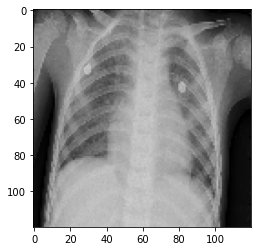

The probability of Pneumonia is:  [0.9999712]


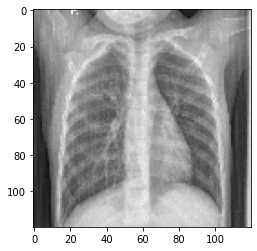

The probability of Pneumonia is:  [0.20330352]


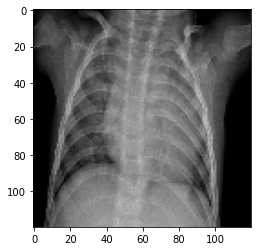

The probability of Pneumonia is:  [0.9999734]


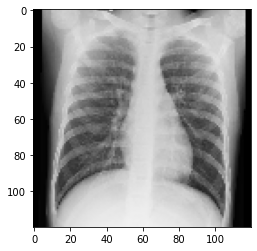

The probability of Pneumonia is:  [0.24425735]


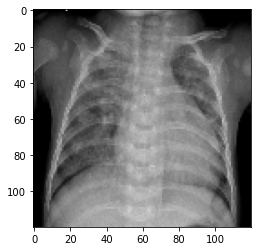

The probability of Pneumonia is:  [0.9999827]


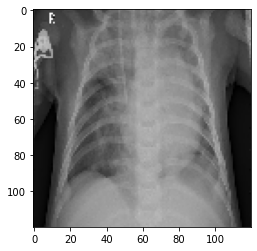

The probability of Pneumonia is:  [0.9999999]


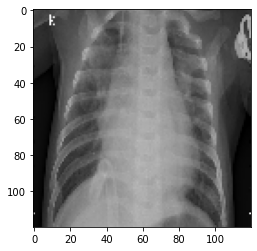

The probability of Pneumonia is:  [0.99999994]


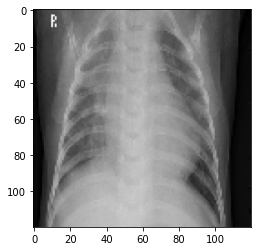

The probability of Pneumonia is:  [0.9999964]


In [15]:
batch_size = test_data.batch_size
num_batches = 1

for i in range(num_batches):
    x, y = next(test_data)
    predictions = model.predict(x)
    
    for j in range(min(batch_size, 8)):
        image = x[j]
        plt.imshow(image)
        plt.show()
        print('The probability of Pneumonia is: ', predictions[j])